In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('COVID_Amazon.csv')

In [3]:
data.head()

,Date,Stock Price,Cases
0,3/2/20,1953.95,16
1,3/3/20,1908.99,21
2,3/4/20,1975.83,36
3,3/5/20,1924.03,67
4,3/6/20,1901.09,83


In [4]:
data.tail()

,Date,Stock Price,Cases
300,12/27/20,3228.30,189044
301,12/28/20,3283.90,201106
302,12/29/20,3322.00,229038
303,12/30/20,3285.85,238446
304,12/31/20,3256.93,225252


In [5]:
data.dtypes

Date            object
Stock Price    float64
Cases            int64
dtype: object

In [6]:
data.index=data['Date']

In [7]:
data.describe()

,Stock Price,Cases
count,305.000000,305.000000
mean,2814.760328,66089.259016
std,484.591827,62264.122348
min,1676.610000,16.000000
25%,2418.020000,26140.000000
50%,3078.100000,44767.000000
75%,3185.070000,69739.000000
max,3531.450000,280514.000000


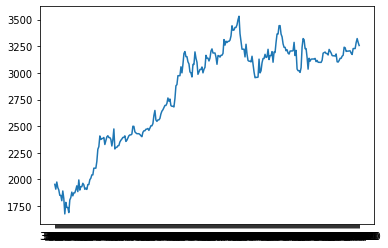

In [8]:
plt.plot(data['Stock Price'], label='Amazon Stock Price')

<function matplotlib.pyplot.show(close=None, block=None)>

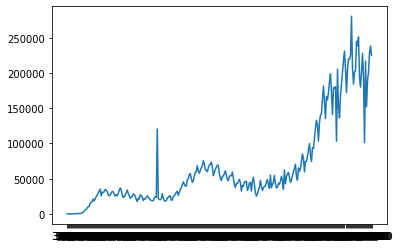

In [9]:
plt.plot(data['Cases'], label='Number of COVID cases')
plt.show

In [19]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [21]:
df = pd.DataFrame(data=data, columns=data['Cases'])

target = pd.DataFrame(data=data, columns=["Stock Price"])

In [23]:
import statsmodels.api as sm

X = data["Cases"]
y = target["Stock Price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Stock Price   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              475.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                    4.46e-64
Time:                        20:52:51   Log-Likelihood:                         -2716.2
No. Observations:                 305   AIC:                                      5434.
Df Residuals:                     304   BIC:                                      5438.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cases          0.0246      0.001     21.795      0.000       0.022       0.027
==============================================================================
Omnibus:                       96.307   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.169
Skew:                          -1.716   Prob(JB):                     5.07e-42
Kurtosis:                       4.785   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import statsmodels.api as sm # import statsmodels 

X = data["Cases"] ## X usually means our input variables (or independent variables)
y = target["Stock Price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Stock Price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           9.37e-25
Time:                        20:57:27   Log-Likelihood:                -2265.0
No. Observations:                 305   AIC:                             4534.
Df Residuals:                     303   BIC:                             4541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2535.6343     34.074     74.416      0.000    2468.583    2602.685
Cases          0.0042      0.000     11.246      0.000       0.003       0.005
==============================================================================
Omnibus:                       33.915   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.397
Skew:                          -0.176   Prob(JB):                      0.00335
Kurtosis:                       2.121   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""